# Análisis exploratorio de datos
Dataset de ICFES pruebas TYT 2016-2

Relizado por Kevin David Rodríguez Belalcázar

### Ignorar warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Carga de datos de forma local

In [2]:
import pandas as pd

icfes_path = "../SABERTYT20162.csv"
df = pd.read_csv(icfes_path, sep=";", encoding="latin1")

In [3]:
df.shape

(53040, 104)

In [4]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_ESTADOCIVIL,ESTU_TIENE_ETNIA,ESTU_ETNIA,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,ESTU_ESTADO,INSE,NSE
0,CC,1 COLOMBIA,M,15/08/1990,20164,EK201640024941,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A2,79,59,121.0,4.0,87.0,85.0,PUBLICAR,"57,14241052",NSE3
1,CC,1 COLOMBIA,M,26/09/1990,20164,EK201640012159,ESTUDIANTE,SOLTERO,NaN,NaN,...,A2,75,74,123.0,4.0,89.0,87.0,PUBLICAR,"65,76637176",NSE4
2,CC,1 COLOMBIA,F,28/10/1994,20164,EK201640041435,ESTUDIANTE,SOLTERO,NO,NaN,...,B1,97,98,99.0,2.0,43.0,44.0,PUBLICAR,"47,68199591",NSE2
3,CC,1 COLOMBIA,F,24/09/1979,20164,EK201640003654,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A1,32,30,75.0,1.0,13.0,11.0,PUBLICAR,"55,56398024",NSE3
4,CC,1 COLOMBIA,M,6/07/1988,20164,EK201640018456,ESTUDIANTE,SOLTERO,NO,NaN,...,A1-,15,19,86.0,2.0,29.0,34.0,PUBLICAR,"27,01330074",NSE1


Análisis inicial de algunas de las categorías que podemos encontrar

In [5]:
for col in df.columns:
    print(df[col].value_counts())

ESTU_TIPODOCUMENTO
CC    50685
TI     2042
CR      253
CE       56
PE        3
PC        1
Name: count, dtype: int64
ESTU_NACIONALIDAD
1 COLOMBIA                 52991
241 VENEZUELA                 16
236 ESTADOS UNIDOS             5
50 COMORAS                     4
174 PERÚ                       2
65 ECUADOR                     2
83 ALEMANIA                    2
119 COREA DEL SUR              2
64 REPÚBLICA DOMINICANA        2
209 ESPAÑA                     2
46 CHILE                       2
167 OMÁN                       1
67 EL SALVADOR                 1
12 ARGENTINA                   1
55 COSTA DE MARFIL             1
171 PANAMÁ                     1
3 ALAND                        1
118 COREA DEL NORTE            1
144 MÉXICO                     1
112 JAPÓN                      1
96 HAITI                       1
Name: count, dtype: int64
ESTU_GENERO
M    28173
F    24865
Name: count, dtype: int64
ESTU_FECHANACIMIENTO
10/08/1995    33
21/06/1996    32
5/11/1996     29
9/04/1997     

### Trabajar con pruebas listas para publicar de estudiantes en Colombia

In [6]:
df = df.loc[~df["ESTU_ESTADO"].str.contains("VALIDEZ OFICINA JURÍDICA")]
df = df.loc[df["ESTU_NACIONALIDAD"].str.contains("1 COLOMBIA")]
print(df["ESTU_ESTADO"].value_counts())
print(df["ESTU_NACIONALIDAD"].value_counts())

ESTU_ESTADO
PUBLICAR    52665
Name: count, dtype: int64
ESTU_NACIONALIDAD
1 COLOMBIA    52665
Name: count, dtype: int64


### Eliminación de columnas innecesarias

In [7]:
df.drop(["ESTU_ESTADO"], inplace=True, axis=1)
df.drop(["ESTU_NACIONALIDAD"], inplace=True, axis=1)

In [8]:
df.shape

(52665, 102)

### Rellenado de datos vacios con np.nan

In [9]:
import numpy as np

df.fillna(np.nan, inplace=True)

In [10]:
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts())

ESTU_TIPODOCUMENTO
CC    50358
TI     2022
CR      248
CE       36
PC        1
Name: count, dtype: int64
ESTU_GENERO
M    27996
F    24667
Name: count, dtype: int64
ESTU_FECHANACIMIENTO
10/08/1995    33
21/06/1996    32
5/11/1996     29
25/04/1995    28
7/04/1997     27
              ..
23/05/1980     1
28/08/1970     1
14/10/1969     1
2/03/2000      1
11/08/1965     1
Name: count, Length: 10090, dtype: int64
ESTU_CONSECUTIVO
EK201640024941    1
EK201640048662    1
EK201640042739    1
EK201640029920    1
EK201640031489    1
                 ..
EK201640021576    1
EK201640021771    1
EK201640021811    1
EK201640021946    1
EK201640024848    1
Name: count, Length: 52665, dtype: int64
ESTU_ESTUDIANTE
ESTUDIANTE    52665
Name: count, dtype: int64
ESTU_ESTADOCIVIL
SOLTERO             40774
UNIÓN LIBRE          6437
CASADO               4835
SEPARADO / VIUDO      569
Name: count, dtype: int64
ESTU_TIENE_ETNIA
NO    45098
SI     3276
Name: count, dtype: int64
ESTU_ETNIA
100 Ninguno          

### Reemplazo de vacios en columnas de limitaciones físicas y cognitivas de estudiantes

In [11]:
columns_dissabilities = ["ESTU_LIMITA_MOTRIZ", "ESTU_LIMITA_INVIDENTE", "ESTU_LIMITA_CONDICIONESPECIAL", "ESTU_LIMITA_SORDO", "ESTU_LIMITA_AUTISMO"]

for col in columns_dissabilities:
    df[col].replace(np.nan, False, inplace=True)
    df[col].replace("x", True, inplace=True)

In [12]:
for col in columns_dissabilities:
    print(df[col].value_counts())

ESTU_LIMITA_MOTRIZ
False    52619
True        46
Name: count, dtype: int64
ESTU_LIMITA_INVIDENTE
False    52661
True         4
Name: count, dtype: int64
ESTU_LIMITA_CONDICIONESPECIAL
False    52658
True         7
Name: count, dtype: int64
ESTU_LIMITA_SORDO
False    52636
True        29
Name: count, dtype: int64
ESTU_LIMITA_AUTISMO
False    52662
True         3
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Columns: 102 entries, ESTU_TIPODOCUMENTO to NSE
dtypes: bool(5), float64(7), int64(18), object(72)
memory usage: 39.6+ MB


### Eliminación de columnas no relevantes para el caso de estudio

In [14]:
filtered_columns = df.filter(like='COD', axis=1)
df.drop(columns=filtered_columns.columns, inplace=True)
df.drop(["PERIODO"], inplace=True, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             52665 non-null  object 
 1   ESTU_GENERO                    52663 non-null  object 
 2   ESTU_FECHANACIMIENTO           52664 non-null  object 
 3   ESTU_CONSECUTIVO               52665 non-null  object 
 4   ESTU_ESTUDIANTE                52665 non-null  object 
 5   ESTU_ESTADOCIVIL               52615 non-null  object 
 6   ESTU_TIENE_ETNIA               48374 non-null  object 
 7   ESTU_ETNIA                     3086 non-null   object 
 8   ESTU_LIMITA_MOTRIZ             52665 non-null  bool   
 9   ESTU_LIMITA_INVIDENTE          52665 non-null  bool   
 10  ESTU_LIMITA_CONDICIONESPECIAL  52665 non-null  bool   
 11  ESTU_LIMITA_SORDO              52665 non-null  bool   
 12  ESTU_LIMITA_AUTISMO            52665 non-null  bool

### Visualización de datos enteros por medio de boxplot

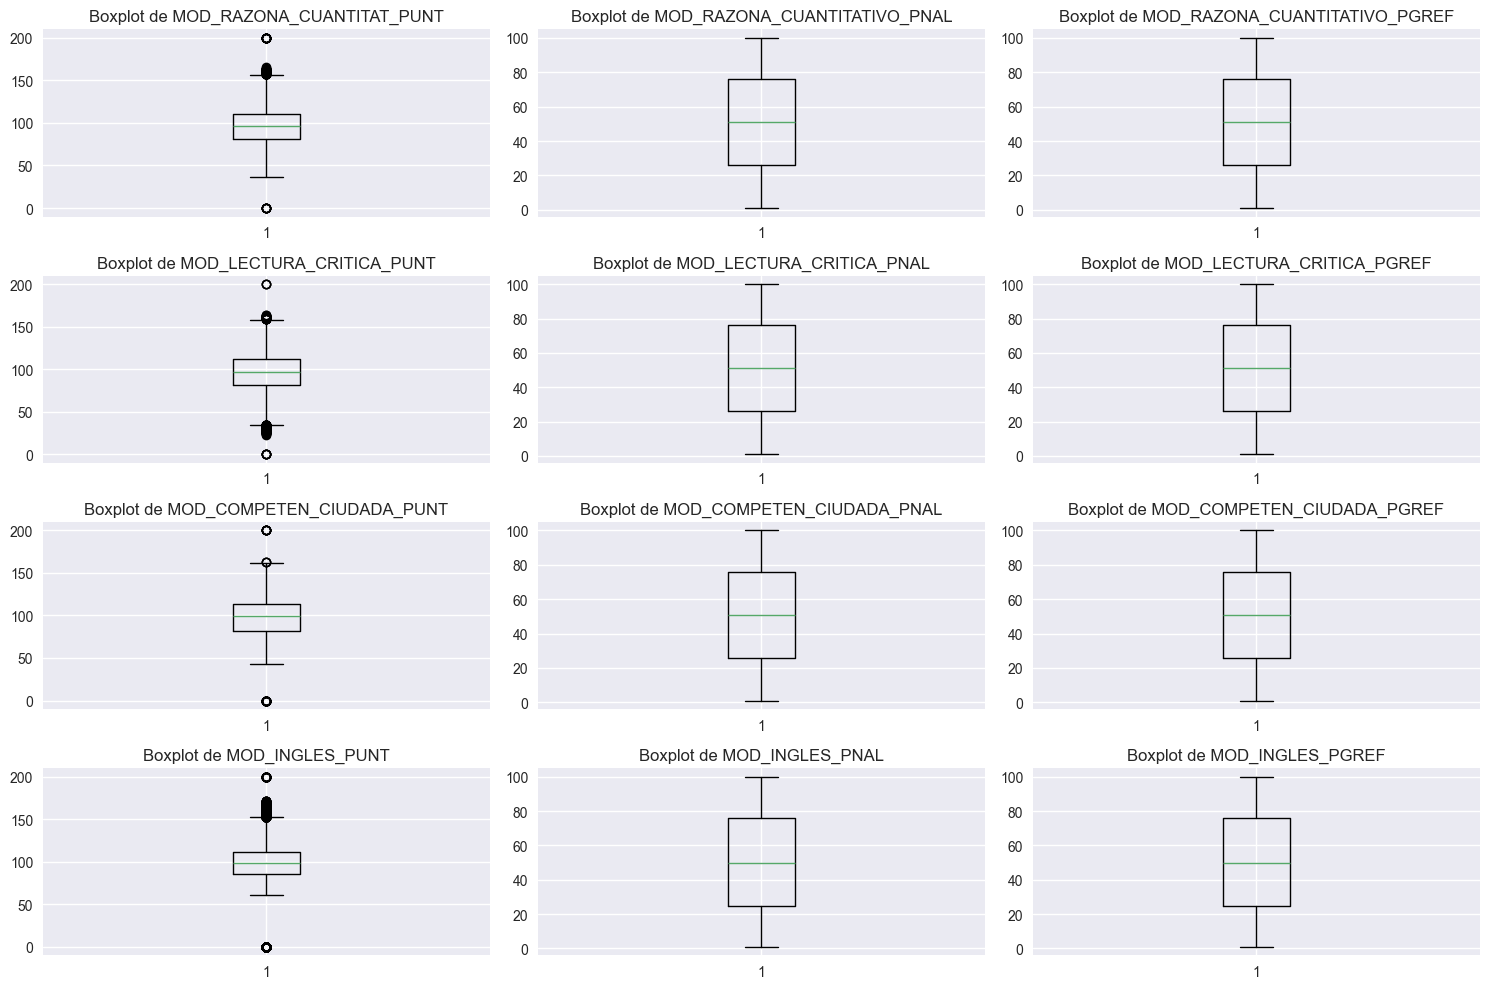

In [16]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('seaborn-v0_8')
matplotlib.rcParams['figure.figsize'] = (15, 10)

int_columns = df.select_dtypes(include="int64").columns

fig, axes = plt.subplots(nrows=4, ncols=3)

for i, column in enumerate(int_columns):

    row = i // 3
    col = i % 3

    ax = axes[row, col]

    ax.boxplot(df[column])
    ax.set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

### Visualización de datos flotantes por medio de boxplot

Index(['ESTU_SNIES_PRGMACADEMICO', 'MOD_COMUNI_ESCRITA_PUNT',
       'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL',
       'MOD_COMUNI_ESCRITA_PGREF'],
      dtype='object')


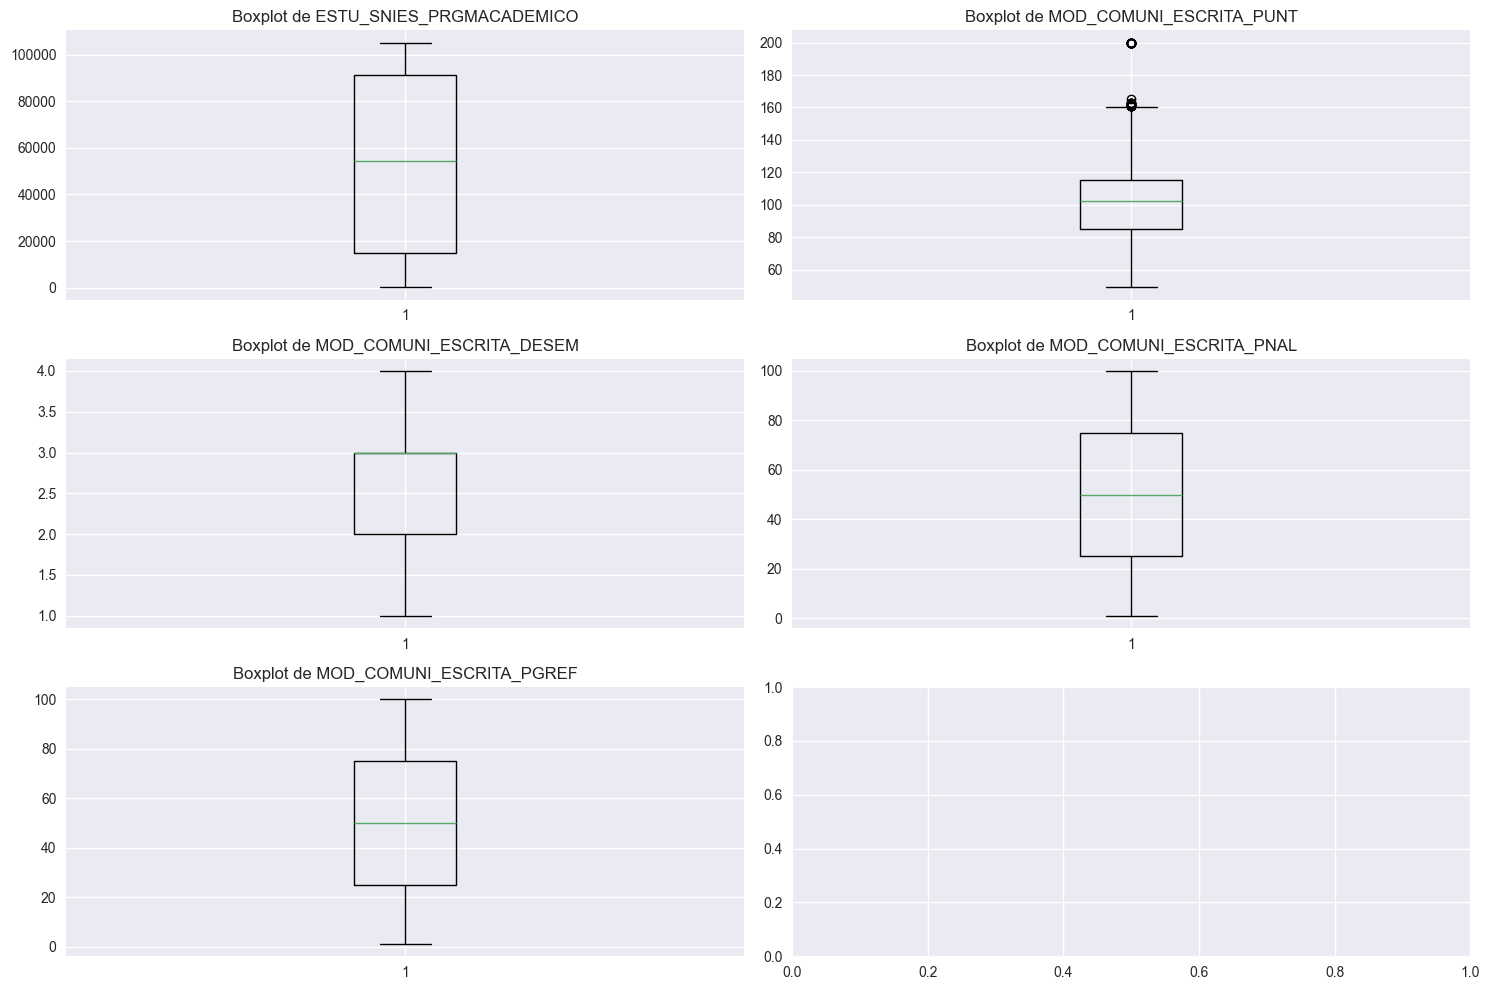

In [17]:
float_columns = df.select_dtypes(include="float64").columns
print(float_columns)

fig, axes = plt.subplots(nrows=3, ncols=2)

for i, column in enumerate(float_columns):

    row = i // 2
    col = i % 2

    ax = axes[row, col]

    data = df[[column]].dropna()

    ax.boxplot(data[column])
    ax.set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

### Transformación a datos tipo datetime sobre las fechas de nacimiento

In [18]:
df["ESTU_FECHANACIMIENTO"] = pd.to_datetime(df["ESTU_FECHANACIMIENTO"], format="%d/%m/%Y")

### Distribución de fechas de nacimiento de los estudiantes

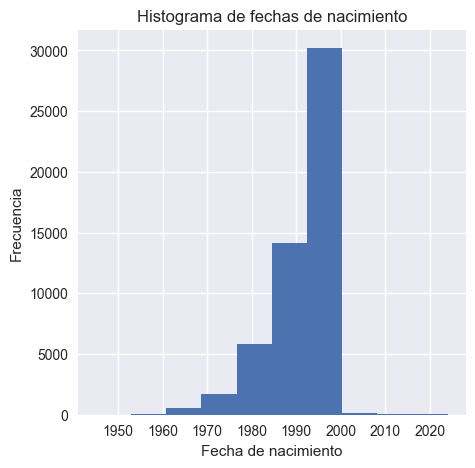

count                            52664
mean     1991-04-25 23:09:31.471973248
min                1944-12-13 00:00:00
25%                1988-04-23 00:00:00
50%                1993-08-07 00:00:00
75%                1996-03-16 00:00:00
max                2024-01-16 00:00:00
Name: ESTU_FECHANACIMIENTO, dtype: object


In [19]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
df["ESTU_FECHANACIMIENTO"].hist()

plt.title("Histograma de fechas de nacimiento")
plt.xlabel("Fecha de nacimiento")
plt.ylabel("Frecuencia")
plt.show()
print(df["ESTU_FECHANACIMIENTO"].describe())

### Encontrar fechas de nacimiento no acordes al contexto de la prueba

In [20]:
df[df["ESTU_FECHANACIMIENTO"] > "2004-01-01"]

,ESTU_TIPODOCUMENTO,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_ESTADOCIVIL,ESTU_TIENE_ETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,...,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,INSE,NSE
405,TI,F,2009-08-23,EK201640022982,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,118,A2,82,82,85.0,2.0,27.0,29.0,"55,369533",NSE2
695,CC,F,2016-08-15,EK201640036962,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,96,A1,46,44,96.0,2.0,34.0,30.0,"45,57938567",NSE1
830,CC,M,2015-10-29,EK201640031909,ESTUDIANTE,SOLTERO,NaN,NaN,False,False,...,120,A2,84,83,117.0,3.0,78.0,75.0,"59,17247976",NSE4
1583,CC,M,2016-05-14,EK201640016911,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,151,B2,99,99,100.0,2.0,47.0,46.0,"48,36099874",NSE2
2191,CC,F,2004-10-16,EK201640039006,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,False,False,...,85,A1,26,24,120.0,3.0,85.0,83.0,"50,44389741",NSE2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50319,CC,F,2016-07-04,EK201640027885,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,89,A1,34,32,85.0,2.0,26.0,23.0,NaN,NaN
51120,CC,M,2016-07-15,EK201640036149,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,83,A1-,22,27,105.0,3.0,64.0,64.0,"62,53218024",NSE4
51215,CC,M,2010-12-04,EK201640046980,ESTUDIANTE,SOLTERO,NO,NaN,False,False,...,108,A2,69,65,105.0,3.0,63.0,63.0,"65,75522654",NSE4
52038,CC,F,2007-03-30,EK201640003184,ESTUDIANTE,SOLTERO,SI,19 Otro grupo étnico minoritario,False,False,...,101,A1,57,53,85.0,2.0,25.0,25.0,"32,16400591",NSE1


### Eliminación de dichos registros

In [21]:
rows_to_remove = df.loc[df["ESTU_FECHANACIMIENTO"] > "2004-01-01"].index
df.drop(rows_to_remove, inplace=True)
print(df["ESTU_FECHANACIMIENTO"].describe())

count                            52594
mean     1991-04-14 17:00:39.289652864
min                1944-12-13 00:00:00
25%                1988-04-21 00:00:00
50%                1993-08-04 00:00:00
75%                1996-03-13 00:00:00
max                2002-12-23 00:00:00
Name: ESTU_FECHANACIMIENTO, dtype: object


### Dispersión de los datos según su fecha de nacimiento y su puntaje en la prueba de razonamiento cuantitativo

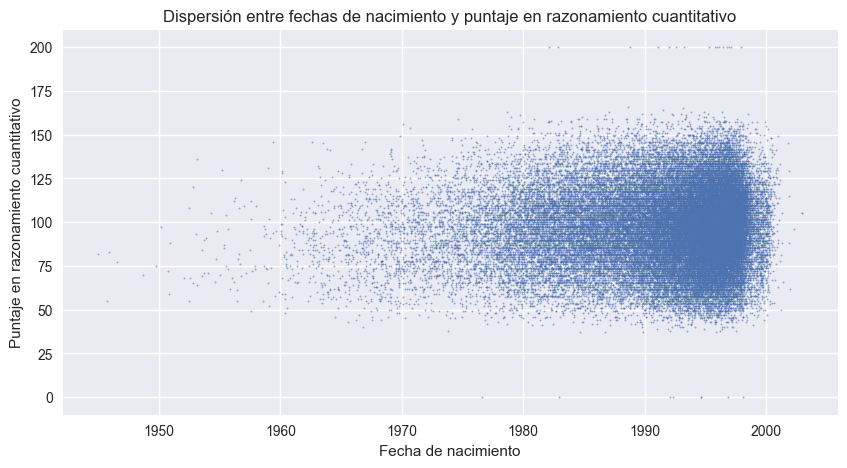

In [22]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

ax = df.plot(kind='scatter', x='ESTU_FECHANACIMIENTO', y='MOD_RAZONA_CUANTITAT_PUNT', alpha=0.5, cmap=plt.get_cmap("jet"), s=1)

plt.title("Dispersión entre fechas de nacimiento y puntaje en razonamiento cuantitativo")
plt.xlabel("Fecha de nacimiento")
plt.ylabel("Puntaje en razonamiento cuantitativo")
plt.show()

### Creación de columna Edad para el año 2016

In [23]:
df["EDAD_2016"] = (pd.to_datetime("2016-10-09") - df["ESTU_FECHANACIMIENTO"]).dt.days // 365
df["EDAD_2016"].describe()

count    52594.000000
mean        25.009241
std          6.922107
min         13.000000
25%         20.000000
50%         23.000000
75%         28.000000
max         71.000000
Name: EDAD_2016, dtype: float64

### Distribucion de las edades

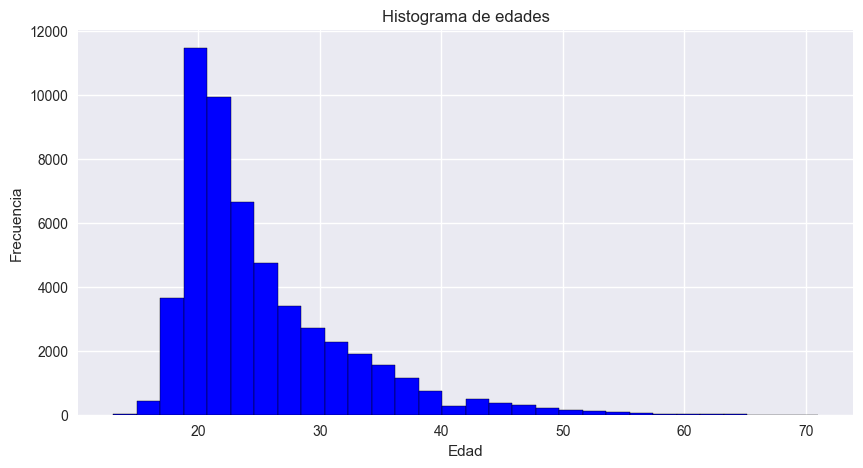

In [24]:
df["EDAD_2016"].hist(color="blue", edgecolor="black", bins=30)

plt.title("Histograma de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### Rellenado de NaN en la columna ESTU_TIENE_ETNIA

In [25]:
df["ESTU_TIENE_ETNIA"].fillna("NO", inplace=True)
df["ESTU_TIENE_ETNIA"].value_counts()

ESTU_TIENE_ETNIA
NO    49324
SI     3271
Name: count, dtype: int64

### Creación de rangos de edades

In [26]:
bins = list(range(0, 101, 5))
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['RANGO_EDADES'] = pd.cut(df['EDAD_2016'], bins=bins, labels=labels, right=False)

### Visualización de estudiantes por rango de edad según su etnia

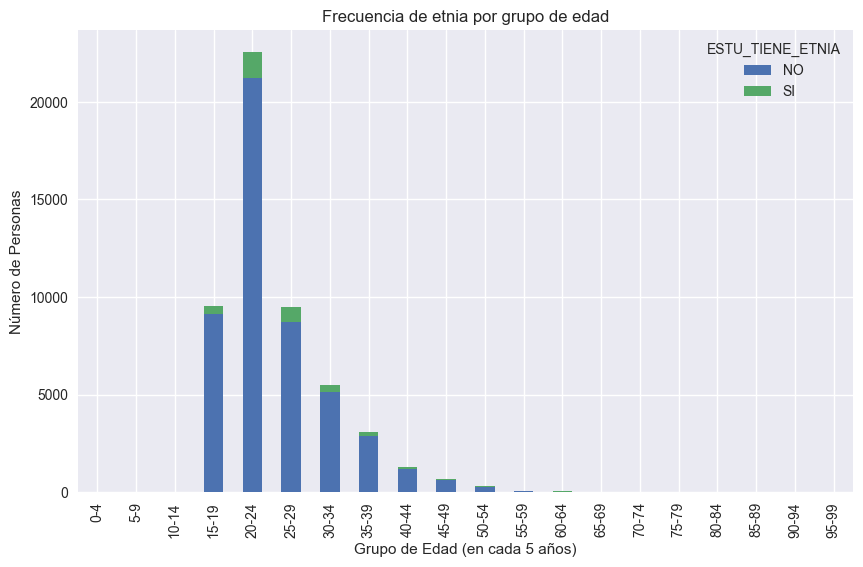

In [27]:
conteo_etnia = df.groupby(['RANGO_EDADES', 'ESTU_TIENE_ETNIA']).size().unstack(fill_value=0)
conteo_etnia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frecuencia de etnia por grupo de edad')
plt.xlabel('Grupo de Edad (en cada 5 años)')
plt.ylabel('Número de Personas')
plt.show()

### Consulta de niveles de inglés

In [28]:
df["MOD_INGLES_DESEM"].value_counts()

MOD_INGLES_DESEM
A1     18768
A2     13517
A1-    12955
B1      5991
B2      1364
Name: count, dtype: int64

### Verificación de cumplimiento de objetivo de inglés

In [29]:
df["CUMPLIO_META_INGLES"] =  df['MOD_INGLES_DESEM'].apply(lambda x: x in ['B1', 'B2'])
df[["MOD_INGLES_DESEM", "CUMPLIO_META_INGLES"]].head()

,MOD_INGLES_DESEM,CUMPLIO_META_INGLES
0,A2,False
1,A2,False
2,B1,True
3,A1,False
4,A1-,False


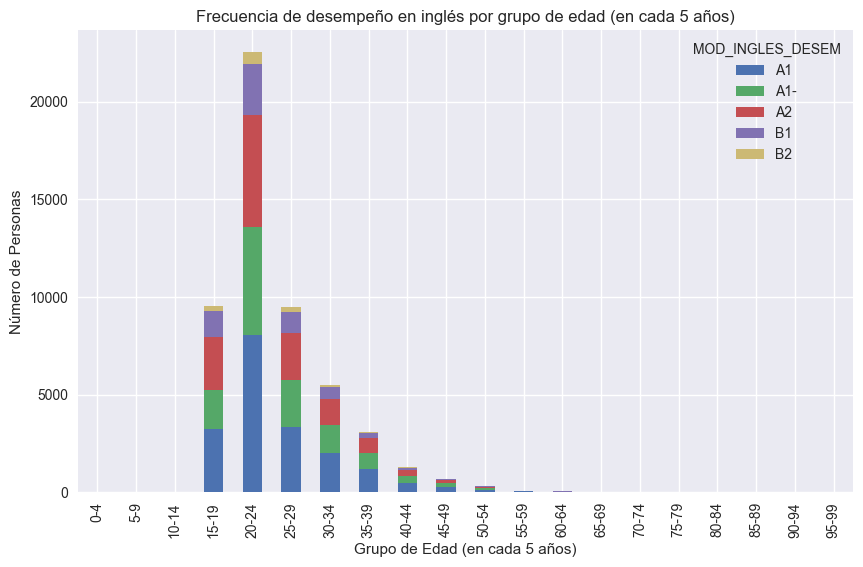

In [30]:
conteo_etnia = df.groupby(['RANGO_EDADES', 'MOD_INGLES_DESEM']).size().unstack(fill_value=0)
conteo_etnia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frecuencia de desempeño en inglés por grupo de edad (en cada 5 años)')
plt.xlabel('Grupo de Edad (en cada 5 años)')
plt.ylabel('Número de Personas')
plt.show()

### Rellenado de columna ESTU_ETNIA

In [31]:
print(df["ESTU_ETNIA"].value_counts())
print(df["ESTU_ETNIA"].isna().sum())
df["ESTU_ETNIA"].fillna("100 Ninguno", inplace=True)
print(df["ESTU_ETNIA"].value_counts())

ESTU_ETNIA
100 Ninguno                         1630
1 Comunidad afrodescendiente         679
19 Otro grupo étnico minoritario     444
4 Paez                                72
18 Zenú                               57
9 Pasto                               42
2 Raizal                              40
6 Embera                              32
7 Pijao                               21
8 Wayúu                               19
11 Inga                               16
17 Guambiano                          10
15 Palenquero                          7
10 Cancuamo                            3
3 Comunidad Rom (gitana)               3
16 Arhuaco                             3
12 Tucano                              2
13 Huitoto                             2
Name: count, dtype: int64
49513
ESTU_ETNIA
100 Ninguno                         51143
1 Comunidad afrodescendiente          679
19 Otro grupo étnico minoritario      444
4 Paez                                 72
18 Zenú                                5

### Hallazgo de dato faltante, estudiante sin residencia

In [32]:
df[df["ESTU_DEPTO_RESIDE"].isna()]

,ESTU_TIPODOCUMENTO,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_ESTADOCIVIL,ESTU_TIENE_ETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,...,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,INSE,NSE,EDAD_2016,RANGO_EDADES,CUMPLIO_META_INGLES
32459,CC,M,1980-03-19,EK201640003367,ESTUDIANTE,NaN,NO,100 Ninguno,False,False,...,39,100.0,2.0,46.0,45.0,NaN,NaN,36.0,35-39,False


### Rellendo teniendo en cuenta sus otras características

In [33]:
df.at[32459, "ESTU_DEPTO_RESIDE"] = "ANTIOQUIA"

### Visualización de promedio de puntajes según edad por competencia para personas afrodescendientes

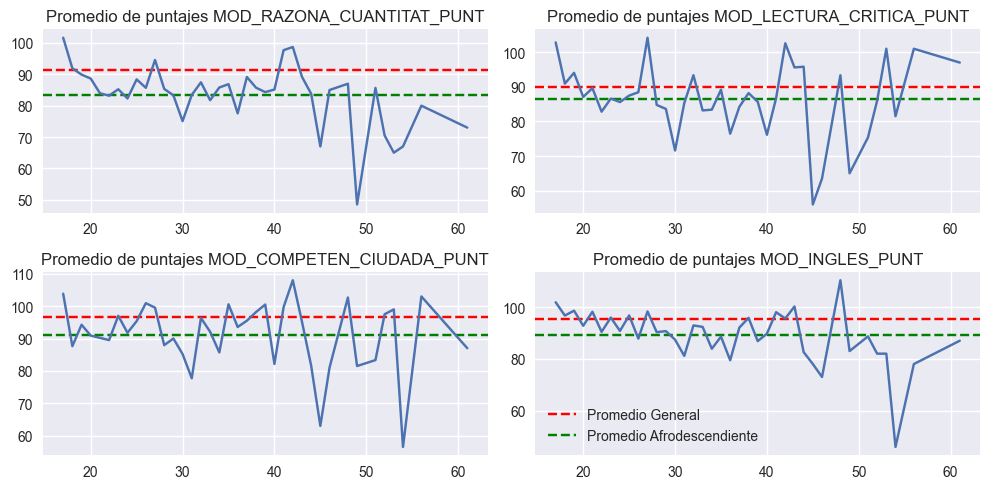

In [34]:
columns_areas = ["MOD_RAZONA_CUANTITAT_PUNT", "MOD_LECTURA_CRITICA_PUNT", "MOD_COMPETEN_CIUDADA_PUNT", "MOD_INGLES_PUNT"]

matplotlib.rcParams['figure.figsize'] = (10, 5)

fig, axes = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(columns_areas):

    row = i // 2
    col_index = i % 2

    ax = axes[row, col_index]

    etnia = df["ESTU_ETNIA"] == "1 Comunidad afrodescendiente"
    afro_grupos = df[etnia].groupby('EDAD_2016')[col].mean().reset_index()
    
    general_mean = df[~etnia].groupby('EDAD_2016')[col].mean().reset_index()
    specific_mean = df[etnia].groupby('EDAD_2016')[col].mean().reset_index()
    ax.axhline(y=general_mean[col].mean(), color='red', linestyle='--', label='Promedio General')
    ax.axhline(y=specific_mean[col].mean(), color='green', linestyle='--', label='Promedio Afrodescendiente')

    ax.plot(afro_grupos['EDAD_2016'], afro_grupos[col], linestyle='-')
    ax.set_title(f'Promedio de puntajes {col}')

plt.legend()
plt.tight_layout()
plt.show()

### Visualización de promedio de puntajes según edad por competencia para estudiantes con limitaciones

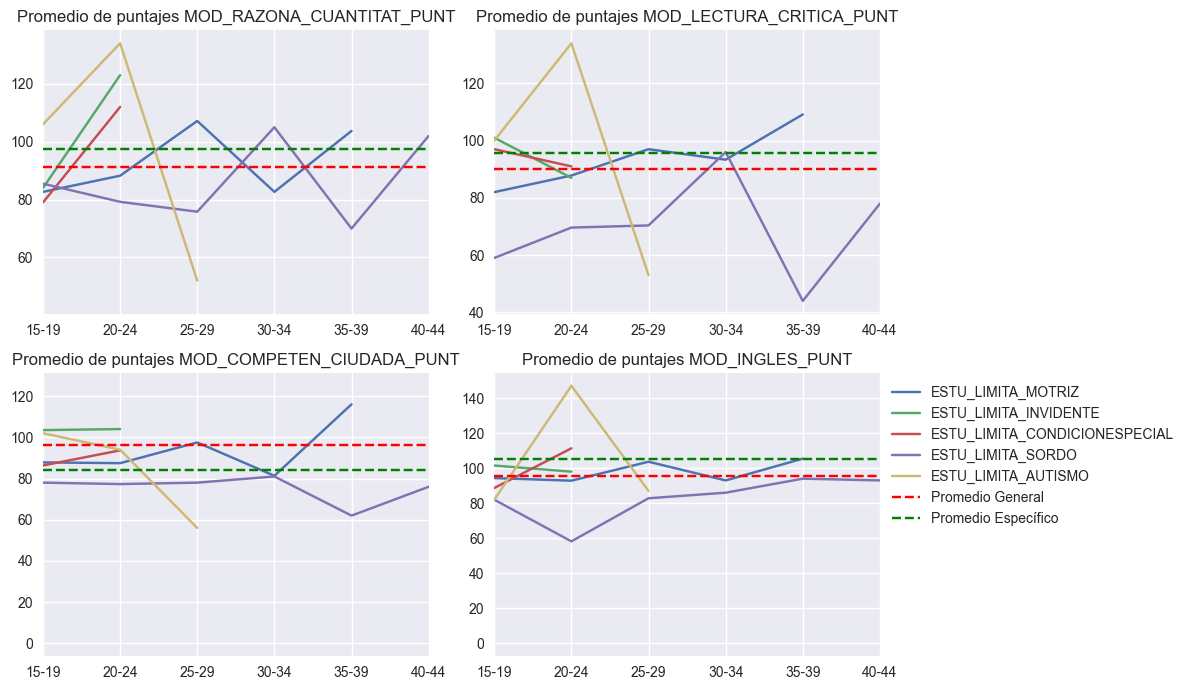

In [35]:
matplotlib.rcParams['figure.figsize'] = (12, 7)

fig, axes = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(columns_areas):

    row = i // 2
    col_index = i % 2

    ax = axes[row, col_index]

    for dis in columns_dissabilities:
        dis_groups = df[df[dis]].groupby('RANGO_EDADES')[col].mean().reset_index()
        ax.plot(dis_groups['RANGO_EDADES'], dis_groups[col], linestyle='-', label=dis)

    general_mean = df[~df[dis]].groupby('EDAD_2016')[col].mean().reset_index()
    specific_mean = df[df[dis]].groupby('EDAD_2016')[col].mean().reset_index()
    ax.axhline(y=general_mean[col].mean(), color='red', linestyle='--', label='Promedio General')
    ax.axhline(y=specific_mean[col].mean(), color='green', linestyle='--', label='Promedio Específico')

    ax.set_title(f'Promedio de puntajes {col}')
    ax.set_xlim("15-19", "40-44")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Análisis de puntajes, correlaciones por medio de distribuciones y matrices de correlación

array([[<Axes: xlabel='MOD_RAZONA_CUANTITAT_PUNT', ylabel='MOD_RAZONA_CUANTITAT_PUNT'>,
        <Axes: xlabel='MOD_LECTURA_CRITICA_PUNT', ylabel='MOD_RAZONA_CUANTITAT_PUNT'>,
        <Axes: xlabel='MOD_COMPETEN_CIUDADA_PUNT', ylabel='MOD_RAZONA_CUANTITAT_PUNT'>,
        <Axes: xlabel='MOD_INGLES_PUNT', ylabel='MOD_RAZONA_CUANTITAT_PUNT'>],
       [<Axes: xlabel='MOD_RAZONA_CUANTITAT_PUNT', ylabel='MOD_LECTURA_CRITICA_PUNT'>,
        <Axes: xlabel='MOD_LECTURA_CRITICA_PUNT', ylabel='MOD_LECTURA_CRITICA_PUNT'>,
        <Axes: xlabel='MOD_COMPETEN_CIUDADA_PUNT', ylabel='MOD_LECTURA_CRITICA_PUNT'>,
        <Axes: xlabel='MOD_INGLES_PUNT', ylabel='MOD_LECTURA_CRITICA_PUNT'>],
       [<Axes: xlabel='MOD_RAZONA_CUANTITAT_PUNT', ylabel='MOD_COMPETEN_CIUDADA_PUNT'>,
        <Axes: xlabel='MOD_LECTURA_CRITICA_PUNT', ylabel='MOD_COMPETEN_CIUDADA_PUNT'>,
        <Axes: xlabel='MOD_COMPETEN_CIUDADA_PUNT', ylabel='MOD_COMPETEN_CIUDADA_PUNT'>,
        <Axes: xlabel='MOD_INGLES_PUNT', ylabel='MOD_COMP

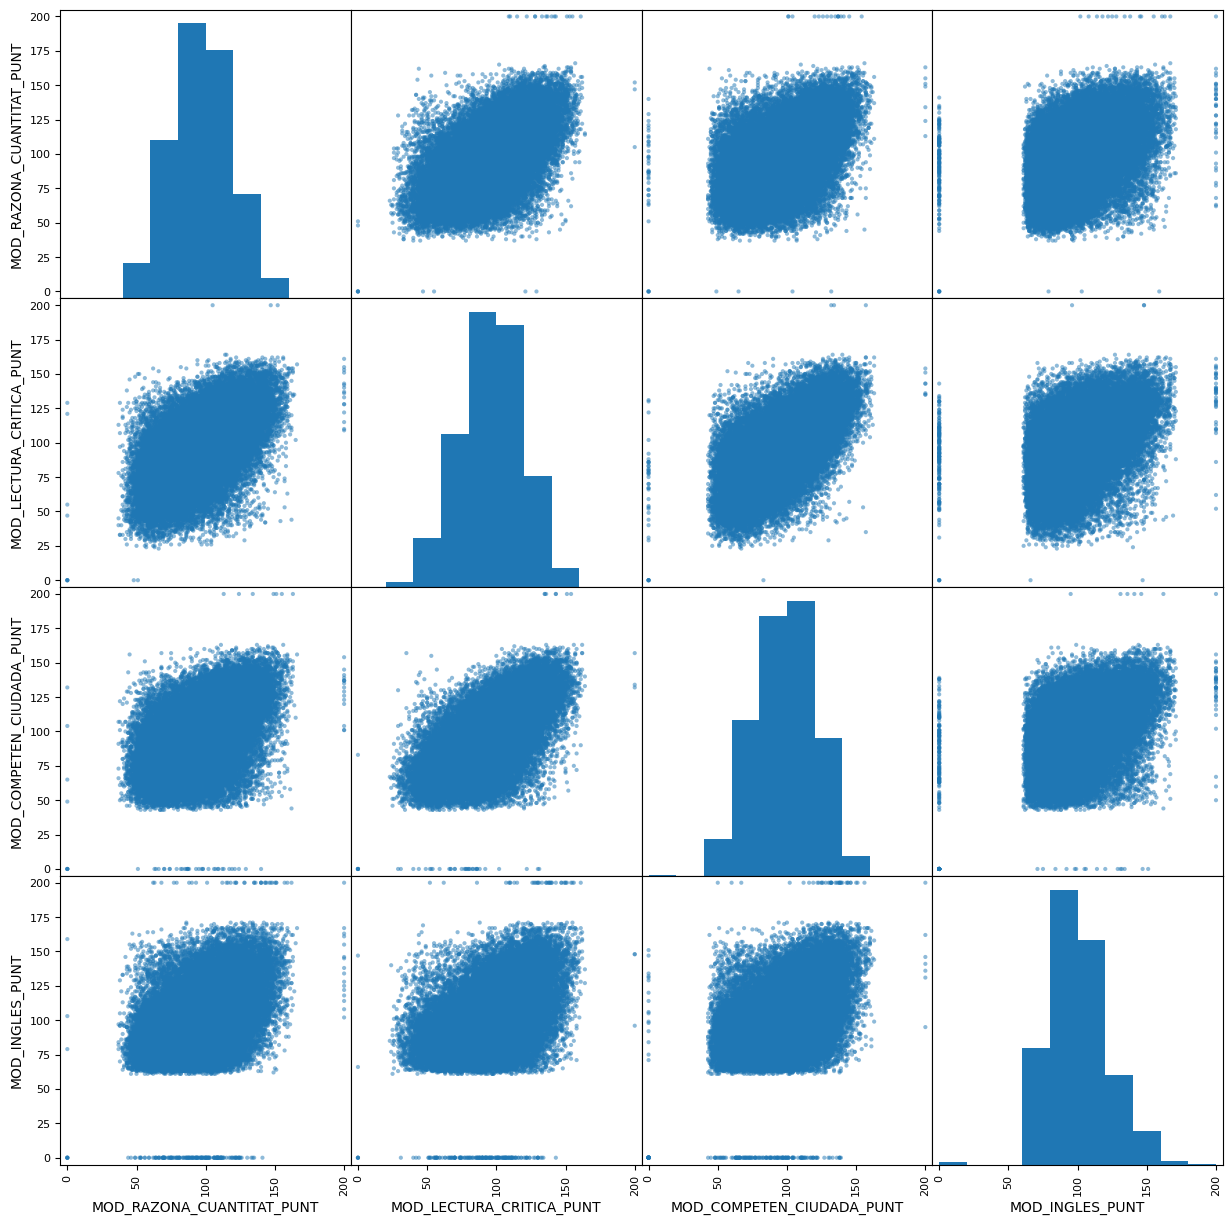

In [36]:
from pandas.plotting import scatter_matrix

plt.style.use('default')
scatter_matrix(df[columns_areas], figsize=(15, 15))

<Axes: >

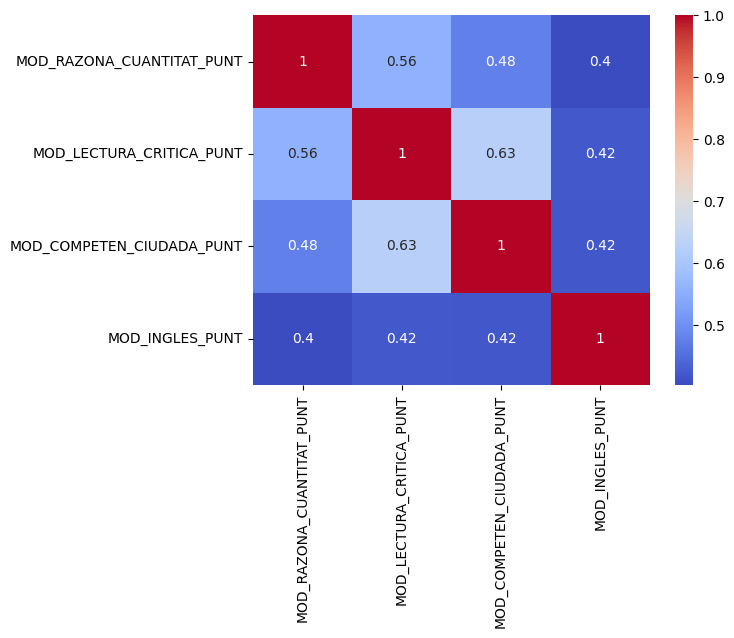

In [37]:
import seaborn as sns

sns.heatmap(df[columns_areas].corr(), annot=True, cmap="coolwarm")

In [38]:
df.select_dtypes(include="object").columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_GENERO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_ESTADOCIVIL', 'ESTU_TIENE_ETNIA', 'ESTU_ETNIA',
       'ESTU_MCPIO_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_COLE_TERMINO',
       'ESTU_OTROCOLE_TERMINO', 'ESTU_AREA_RESIDE',
       'ESTU_TITULO_OBTENIDOBACHILLER', 'ESTU_VALOR_MATRICULAUNIVER',
       'ESTU_PAGO_MATRICULA_PADRES', 'ESTU_PAGO_MATRICULA_CREDITO',
       'ESTU_PAGO_MATRICULA_PROPIO', 'ESTU_PAGO_MATRICULA_BECA',
       'ESTU_CURSO_DOCENTESIES', 'ESTU_CURSO_IES_APOYOEXTERNO',
       'ESTU_CURSO_IESEXTERNA', 'ESTU_ACTIVIDAD_REFUERZOAREA',
       'ESTU_ACTI_REFUERZOGENERICAS', 'ESTU_SIMULACRO_TIPOICFES',
       'ESTU_COMO_CAPACITOEXAMEN', 'ESTU_SEMESTRE_CURSA',
       'ESTU_HORAS_SEMANATRABAJA', 'ESTU_TIPO_REMUNERACION',
       'ESTU_DEDICACION_INTERNET', 'ESTU_NUMERO_LIBROS',
       'ESTU_DEDICACION_LECTURADIARIA', 'ESTU_PREGRADO_EXAM_SBPRO',
       'ESTU_UN_POSTGRADO', 'ESTU_OTRO_PREGRADO', 'ESTU_CURSO_NOPREGRADO',
       'FAMI_OCUPAC

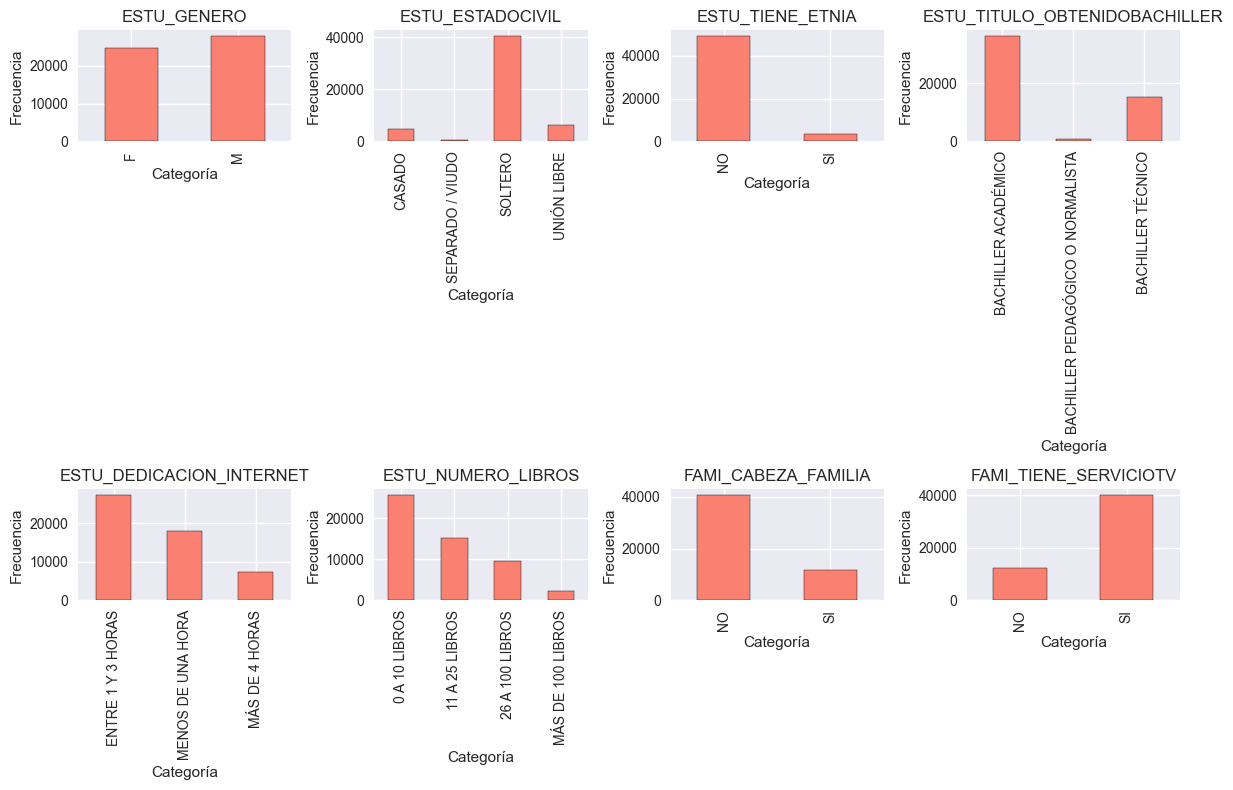

In [39]:
relevant_cat_columns = ["ESTU_GENERO", "ESTU_ESTADOCIVIL", "ESTU_TIENE_ETNIA", "ESTU_TITULO_OBTENIDOBACHILLER",
                        "ESTU_DEDICACION_INTERNET", "ESTU_NUMERO_LIBROS", "FAMI_CABEZA_FAMILIA", "FAMI_TIENE_SERVICIOTV"]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

for i, column in enumerate(df[relevant_cat_columns].columns, 1):
    plt.subplot(2, 4, i)
    df[relevant_cat_columns][column].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(column)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()


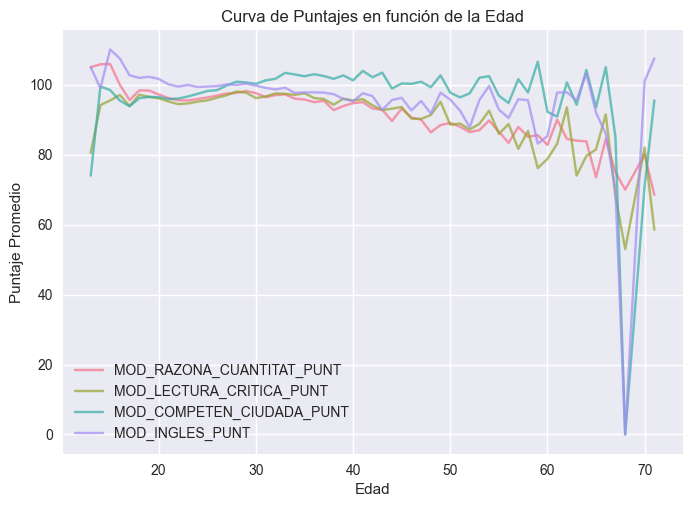

In [40]:
palette = sns.color_palette("husl", len(columns_areas))

for i, col in enumerate(columns_areas):
    age_group = df.groupby('EDAD_2016')[col].mean().reset_index()
    plt.plot(age_group['EDAD_2016'], age_group[col], label=col, linestyle='-', color=palette[i], alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Puntaje Promedio')
plt.title('Curva de Puntajes en función de la Edad')

plt.legend()
plt.show()

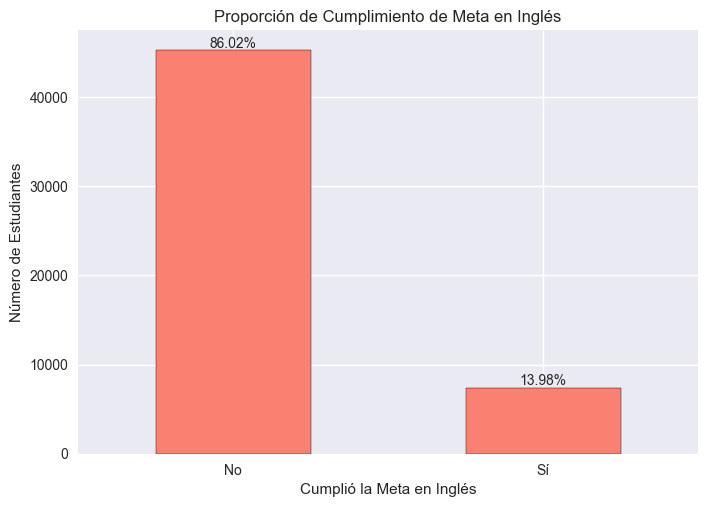

In [41]:
proportions = df["CUMPLIO_META_INGLES"].value_counts() / len(df)

ax = df["CUMPLIO_META_INGLES"].value_counts().plot(kind='bar', color='salmon', edgecolor='black')

ax.set_xticklabels(['No', 'Sí'], rotation=0)
plt.xlabel('Cumplió la Meta en Inglés')
plt.ylabel('Número de Estudiantes')
plt.title('Proporción de Cumplimiento de Meta en Inglés')

for index, value in enumerate(proportions):
    plt.text(index, df["CUMPLIO_META_INGLES"].value_counts()[index], f'{value:.2%}', ha='center', va='bottom')

plt.show()
